In [1]:
import pandas as pd
from rdkit import Chem
import seaborn as sns
from tqdm import tqdm
import numpy as np

In [2]:
! ls processed/

aid_589039_clinically_relevant.csv  drugbank_processed.csv
carbon-mangels_2011.csv		    flockheart.csv
CHEMBL1142817.csv		    xin_xu_ncats_adme.csv


In [3]:
aid_589 = pd.read_csv("./processed/aid_589039_clinically_relevant.csv")
aid_589.head(2)

,PUBCHEM_RESULT_TAG,PUBCHEM_SID,PUBCHEM_CID,PUBCHEM_EXT_DATASOURCE_SMILES,PUBCHEM_ACTIVITY_OUTCOME,PUBCHEM_ACTIVITY_SCORE,PUBCHEM_ACTIVITY_URL,PUBCHEM_ASSAYDATA_COMMENT,Standard Type,Activity Comment,CANONICAL_SMILES,INCHIKEY,dataset,data_type,action_type
0,1,103164548.0,5284616.0,C[C@@H]1CC[C@H]2C[C@@H](/C(=C/C=C/C=C/[C@H](C[...,Unspecified,NaN,NaN,Potential missing data,Activity,Substrate,COC1C(=O)C(C)C[C@H](C)/C=C/C=C/C=C(\C)[C@@H](O...,DVSZTYJRXBBIFA-FBAQEZMUSA-N,aid_589039_clinically_relevant,assay,substrate
1,2,103164549.0,445643.0,C[C@@H]1C[C@@H]([C@@H]2[C@H](C[C@H]([C@@](O2)(...,Unspecified,NaN,NaN,Potential missing data,Activity,Substrate,C=CCC1=CC(C)C[C@H](C)C[C@H](OC)[C@H]2O[C@@](O)...,SLUYGGAVUSVJOT-VZCWQGFJSA-N,aid_589039_clinically_relevant,assay,substrate


In [4]:
carbon_mangels = pd.read_csv("./processed/carbon-mangels_2011.csv")
carbon_mangels.head(2)

,common_name,SMILES,Active,CANONICAL_SMILES,INCHIKEY,dataset,data_type,action_type
0,abacavir,Nc1nc(NC2CC2)c2ncn([C@H]3C=C[C@@H](CO)C3)c2n1,0,Nc1nc(NC2CC2)c2ncn([C@H]3C=C[C@@H](CO)C3)c2n1,MCGSCOLBFJQGHM-SCZZXKLOSA-N,carbon-mangels_2011,assay,substrate
1,abecarnil,COCc1c(C(=O)OC(C)C)ncc2[nH]c3ccc(OCc4ccccc4)cc...,0,COCc1c(C(=O)OC(C)C)ncc2[nH]c3ccc(OCc4ccccc4)cc...,RLFKILXOLJVUNF-UHFFFAOYSA-N,carbon-mangels_2011,assay,substrate


In [5]:
chembl_clin = pd.read_csv("./processed/CHEMBL1142817.csv")
chembl_clin.head(2)

,Molecule ChEMBL ID,Molecule Name,Molecule Max Phase,Molecular Weight,#RO5 Violations,AlogP,Compound Key,Smiles,Standard Type,Standard Relation,...,Document Year,Cell ChEMBL ID,Properties,Action Type,Standard Text Value,CANONICAL_SMILES,INCHIKEY,dataset,data_type,action_type
0,CHEMBL839,CARTEOLOL,4.0,292.38,0.0,1.70,Carteolol,CC(C)(C)NCC(O)COc1cccc2c1CCC(=O)N2,Log 1/Km,'=',...,2005,NaN,NaN,NaN,NaN,CC(C)(C)NCC(O)COc1cccc2c1CCC(=O)N2,LWAFSWPYPHEXKX-UHFFFAOYSA-N,CHEMBL1142817,assay,substrate
1,CHEMBL1423,PIMOZIDE,4.0,461.56,1.0,5.86,SID56422165,O=c1[nH]c2ccccc2n1C1CCN(CCCC(c2ccc(F)cc2)c2ccc...,Log 1/Km,'=',...,2005,NaN,NaN,NaN,NaN,O=c1[nH]c2ccccc2n1C1CCN(CCCC(c2ccc(F)cc2)c2ccc...,YVUQSNJEYSNKRX-UHFFFAOYSA-N,CHEMBL1142817,assay,substrate


In [6]:
drugbank = pd.read_csv("./processed/drugbank_processed.csv")
drugbank.head(2)

,common_name,SMILES,CANONICAL_SMILES,INCHIKEY,dataset,action_type,active
0,Indinavir,CC(C)(C)NC(=O)[C@@H]1CN(CCN1C[C@H](C[C@@H](CC2...,CC(C)(C)NC(=O)C1CN(Cc2cccnc2)CCN1C[C@@H](O)CC(...,CBVCZFGXHXORBI-IXVTTXLYSA-N,drugbank,substrate,True
1,Lovastatin,CC[C@H](C)C(=O)O[C@H]1C[C@H](C=C2[C@H]1[C@H]([...,CCC(C)C(=O)O[C@H]1C[C@@H](C)C=C2C=C[C@H](C)[C@...,PCZOHLXUXFIOCF-SGFUJYLFSA-N,drugbank,substrate,True


In [7]:
flockheart = pd.read_csv("./processed/flockheart.csv")
flockheart.head(2)

,Drug,SMILES,CANONICAL_SMILES,INCHIKEY,dataset,action_type,active
0,abemaciclib,CCN1CCN(CC1)CC2=CN=C(C=C2)NC3=NC=C(C(=N3)C4=CC...,CCN1CCN(Cc2ccc(Nc3ncc(F)c(-c4cc(F)c5nc(C)n(C(C...,UZWDCWONPYILKI-UHFFFAOYSA-N,flockheart,substrate,True
1,abiraterone,C[C@]12CC[C@@H](CC1=CC[C@@H]3[C@@H]2CC[C@]4([C...,C[C@]12CC[C@H](O)CC1=CC[C@@H]1[C@@H]2CC[C@]2(C...,GZOSMCIZMLWJML-VJLLXTKPSA-N,flockheart,substrate,True


In [8]:
xin = pd.read_csv("./processed/xin_xu_ncats_adme.csv")
xin.head(2)

,SMILES,CYP2C9 Substrate Class,CYP2D6 Substrate Class,CYP3A4 Substrate Class,CYP2C9 Activity Class,CYP2D6 Activity Class,CYP3A4 Activity Class,CYP2C9 Inhibitor Class,CYP2D6 Inhibitor Class,CYP3A4_ Inhibitor Class,CANONICAL_SMILES,INCHIKEY,dataset,data_type,action_type
0,CC(C)(C)C1=C(O)C=CC(O)=C1,0.0,0.0,0.0,0.0,0.0,1.0,0,0,1,CC(C)(C)c1cc(O)ccc1O,BGNXCDMCOKJUMV-UHFFFAOYSA-N,XinXu_NCATS_ADME_raw,assay,substrate
1,OC(=O)C\C(=C/C(O)=O)C(O)=O,NaN,0.0,NaN,0.0,0.0,0.0,NaN,0,NaN,O=C(O)C=C(CC(=O)O)C(=O)O,GTZCVFVGUGFEME-UHFFFAOYSA-N,XinXu_NCATS_ADME_raw,assay,substrate


In [9]:
combined_literature = pd.concat([aid_589, carbon_mangels, chembl_clin, drugbank, flockheart, xin])
combined_literature

,PUBCHEM_RESULT_TAG,PUBCHEM_SID,PUBCHEM_CID,PUBCHEM_EXT_DATASOURCE_SMILES,PUBCHEM_ACTIVITY_OUTCOME,PUBCHEM_ACTIVITY_SCORE,PUBCHEM_ACTIVITY_URL,PUBCHEM_ASSAYDATA_COMMENT,Standard Type,Activity Comment,...,Drug,CYP2C9 Substrate Class,CYP2D6 Substrate Class,CYP3A4 Substrate Class,CYP2C9 Activity Class,CYP2D6 Activity Class,CYP3A4 Activity Class,CYP2C9 Inhibitor Class,CYP2D6 Inhibitor Class,CYP3A4_ Inhibitor Class
0,1.0,103164548.0,5284616.0,C[C@@H]1CC[C@H]2C[C@@H](/C(=C/C=C/C=C/[C@H](C[...,Unspecified,NaN,NaN,Potential missing data,Activity,Substrate,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,103164549.0,445643.0,C[C@@H]1C[C@@H]([C@@H]2[C@H](C[C@H]([C@@](O2)(...,Unspecified,NaN,NaN,Potential missing data,Activity,Substrate,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,103166970.0,2477.0,C1CCC2(C1)CC(=O)N(C(=O)C2)CCCCN3CCN(CC3)C4=NC=...,Unspecified,NaN,NaN,Potential missing data,Activity,Substrate,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,103169851.0,123619.0,CC1=NC=C(C=C1)C2=C(C=C(C=N2)Cl)C3=CC=C(C=C3)S(...,Unspecified,NaN,NaN,Potential missing data,Activity,Substrate,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,103172458.0,53232.0,CC[C@H](C)C(=O)O[C@H]1C[C@H](C=C2[C@H]1[C@H]([...,Unspecified,NaN,NaN,Potential missing data,Activity,Substrate,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4297,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,1.0,1.0,0.0,1.0,1.0,0,subs/inhib,subs/inhib
4298,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,1.0,1.0,0.0,1.0,subs/inhib,NaN,subs/inhib
4299,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,0.0,1.0,0.0,0.0,1.0,0,0,subs/inhib
4300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,NaN,0.0,0.0,0.0,NaN,0,NaN


In [10]:
combined_literature.INCHIKEY.isna().sum()

np.int64(22)

In [11]:
combined_literature.dropna(subset="INCHIKEY", inplace=True)

In [12]:
# clean up a bit

In [13]:
cols = combined_literature.columns

In [14]:
keepcols = ["CANONICAL_SMILES", "INCHIKEY", "dataset", "action_type", "active", "common_name"]

In [15]:
combined_literature_clean = combined_literature[keepcols]

In [16]:
combined_literature_clean["active"] = True

/tmp/ipykernel_186376/1528387074.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_literature_clean["active"] = True


In [17]:
combined_literature_clean

,CANONICAL_SMILES,INCHIKEY,dataset,action_type,active,common_name
0,COC1C(=O)C(C)C[C@H](C)/C=C/C=C/C=C(\C)[C@@H](O...,DVSZTYJRXBBIFA-FBAQEZMUSA-N,aid_589039_clinically_relevant,substrate,True,NaN
1,C=CCC1=CC(C)C[C@H](C)C[C@H](OC)[C@H]2O[C@@](O)...,SLUYGGAVUSVJOT-VZCWQGFJSA-N,aid_589039_clinically_relevant,substrate,True,NaN
2,O=C1CC2(CCCC2)CC(=O)N1CCCCN1CCN(c2ncccn2)CC1,QWCRAEMEVRGPNT-UHFFFAOYSA-N,aid_589039_clinically_relevant,substrate,True,NaN
3,Cc1ccc(-c2ncc(Cl)cc2-c2ccc(S(C)(=O)=O)cc2)cn1,MNJVRJDLRVPLFE-UHFFFAOYSA-N,aid_589039_clinically_relevant,substrate,True,NaN
4,CCC(C)C(=O)O[C@H]1C[C@@H](C)C=C2C=C[C@H](C)[C@...,PCZOHLXUXFIOCF-SGFUJYLFSA-N,aid_589039_clinically_relevant,substrate,True,NaN
...,...,...,...,...,...,...
4297,CCOC(=O)CSc1nc2c(sc3ccccc32)c(=O)n1CCCN1CCCC1,SKDRHRAYBYQVNU-UHFFFAOYSA-N,XinXu_NCATS_ADME_raw,substrate,True,NaN
4298,CCc1ccc(-c2nc(CSCC(=O)NCCc3ccccc3)c(C)o2)cc1,QTDYVSIBWGVBKU-UHFFFAOYSA-N,XinXu_NCATS_ADME_raw,substrate,True,NaN
4299,CC(C)[C@@H](c1ccc(C(F)(F)F)cc1CN(Cc1cc(C(F)(F)...,DZNFADLAFQEDJQ-DEOSSOPVSA-N,XinXu_NCATS_ADME_raw,substrate,True,NaN
4300,COCCOc1nc(N)c2[nH]c(=O)n(Cc3ccc(C(=O)O)cc3)c2n1,ATISKRYGYNSRNP-UHFFFAOYSA-N,XinXu_NCATS_ADME_raw,substrate,True,NaN


In [18]:
combined_literature_clean.INCHIKEY.duplicated().sum()

np.int64(1074)

In [19]:
combined_literature_clean

,CANONICAL_SMILES,INCHIKEY,dataset,action_type,active,common_name
0,COC1C(=O)C(C)C[C@H](C)/C=C/C=C/C=C(\C)[C@@H](O...,DVSZTYJRXBBIFA-FBAQEZMUSA-N,aid_589039_clinically_relevant,substrate,True,NaN
1,C=CCC1=CC(C)C[C@H](C)C[C@H](OC)[C@H]2O[C@@](O)...,SLUYGGAVUSVJOT-VZCWQGFJSA-N,aid_589039_clinically_relevant,substrate,True,NaN
2,O=C1CC2(CCCC2)CC(=O)N1CCCCN1CCN(c2ncccn2)CC1,QWCRAEMEVRGPNT-UHFFFAOYSA-N,aid_589039_clinically_relevant,substrate,True,NaN
3,Cc1ccc(-c2ncc(Cl)cc2-c2ccc(S(C)(=O)=O)cc2)cn1,MNJVRJDLRVPLFE-UHFFFAOYSA-N,aid_589039_clinically_relevant,substrate,True,NaN
4,CCC(C)C(=O)O[C@H]1C[C@@H](C)C=C2C=C[C@H](C)[C@...,PCZOHLXUXFIOCF-SGFUJYLFSA-N,aid_589039_clinically_relevant,substrate,True,NaN
...,...,...,...,...,...,...
4297,CCOC(=O)CSc1nc2c(sc3ccccc32)c(=O)n1CCCN1CCCC1,SKDRHRAYBYQVNU-UHFFFAOYSA-N,XinXu_NCATS_ADME_raw,substrate,True,NaN
4298,CCc1ccc(-c2nc(CSCC(=O)NCCc3ccccc3)c(C)o2)cc1,QTDYVSIBWGVBKU-UHFFFAOYSA-N,XinXu_NCATS_ADME_raw,substrate,True,NaN
4299,CC(C)[C@@H](c1ccc(C(F)(F)F)cc1CN(Cc1cc(C(F)(F)...,DZNFADLAFQEDJQ-DEOSSOPVSA-N,XinXu_NCATS_ADME_raw,substrate,True,NaN
4300,COCCOc1nc(N)c2[nH]c(=O)n(Cc3ccc(C(=O)O)cc3)c2n1,ATISKRYGYNSRNP-UHFFFAOYSA-N,XinXu_NCATS_ADME_raw,substrate,True,NaN


In [20]:
appears = combined_literature_clean.groupby("INCHIKEY")["dataset"].nunique().reset_index(name="appears_in_N_datasets")
appears.set_index("INCHIKEY")

,appears_in_N_datasets
INCHIKEY,
AAAQFGUYHFJNHI-GOSISDBHSA-N,1
AAAQFGUYHFJNHI-SFHVURJKSA-N,1
AABFWJDLCCDJJN-UHFFFAOYSA-N,1
AADCDMQTJNYOSS-LBPRGKRZSA-N,1
AADVZSXPNRLYLV-IQCVEUMDSA-N,1
...,...
ZZUKALQMHNSWTK-UHFFFAOYSA-N,1
ZZVGLDBDDYESAB-UHFFFAOYSA-N,1
ZZVUWRFHKOJYTH-UHFFFAOYSA-N,2


In [21]:
appears.isna().sum()

INCHIKEY                 0
appears_in_N_datasets    0
dtype: int64

<Axes: xlabel='appears_in_N_datasets', ylabel='count'>

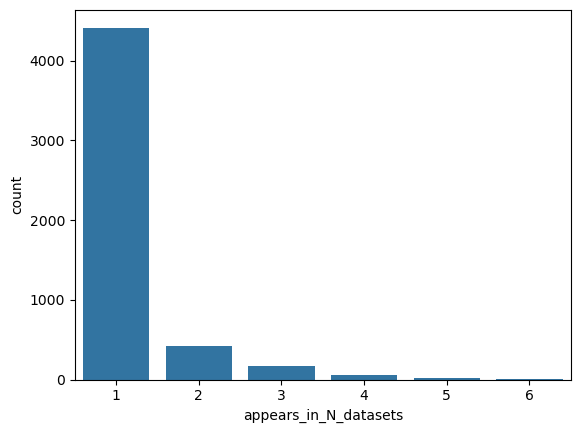

In [22]:
sns.countplot(data=appears, x="appears_in_N_datasets")

In [23]:
combined_literature_clean_w_counts = combined_literature_clean.merge(appears, on="INCHIKEY")


In [24]:
combined_literature_clean_w_counts.sort_values("appears_in_N_datasets", ascending=False)

,CANONICAL_SMILES,INCHIKEY,dataset,action_type,active,common_name,appears_in_N_datasets
790,O=c1[nH]c2ccccc2n1C1CCN(CCCC(c2ccc(F)cc2)c2ccc...,YVUQSNJEYSNKRX-UHFFFAOYSA-N,CHEMBL1142817,substrate,True,NaN,6
791,CC(C)(C)NC(=O)C1C[C@@H]2CCCC[C@@H]2CN1C[C@@H](...,QWAXKHKRTORLEM-PVCXOJBVSA-N,CHEMBL1142817,substrate,True,NaN,6
794,NC(=O)N1c2ccccc2C=Cc2ccccc21,FFGPTBGBLSHEPO-UHFFFAOYSA-N,CHEMBL1142817,substrate,True,NaN,6
2060,O=c1[nH]c2ccccc2n1C1CCN(CCCC(c2ccc(F)cc2)c2ccc...,YVUQSNJEYSNKRX-UHFFFAOYSA-N,XinXu_NCATS_ADME_raw,substrate,True,NaN,6
591,O=c1[nH]c2ccccc2n1C1CCN(CCCC(c2ccc(F)cc2)c2ccc...,YVUQSNJEYSNKRX-UHFFFAOYSA-N,carbon-mangels_2011,substrate,True,pimozide,6
...,...,...,...,...,...,...,...
3119,CCN(CC)CCSC(=O)C(c1ccccc1)c1ccccc1,WHLUQAYNVOGZST-UHFFFAOYSA-N,XinXu_NCATS_ADME_raw,substrate,True,NaN,1
3118,COc1ccc(/C=C/C(=O)O)cc1,AFDXODALSZRGIH-QPJJXVBHSA-N,XinXu_NCATS_ADME_raw,substrate,True,NaN,1
442,CCOC(=O)C1=C(C)N=C(C)C(C(=O)OCC)C1c1ccccc1/C=C...,BGYJFSXPRMOZJK-PFONDFGASA-N,carbon-mangels_2011,substrate,True,lacidipine,1
3116,CCCCNC(=O)NS(=O)(=O)c1ccc(N)cc1,VDTNNGKXZGSZIP-UHFFFAOYSA-N,XinXu_NCATS_ADME_raw,substrate,True,NaN,1


In [25]:
df_dummies = pd.get_dummies(combined_literature_clean_w_counts['dataset'], prefix='dataset').join(combined_literature_clean_w_counts["INCHIKEY"])
df_dummies

,dataset_CHEMBL1142817,dataset_XinXu_NCATS_ADME_raw,dataset_aid_589039_clinically_relevant,dataset_carbon-mangels_2011,dataset_drugbank,dataset_flockheart,INCHIKEY
0,False,False,True,False,False,False,DVSZTYJRXBBIFA-FBAQEZMUSA-N
1,False,False,True,False,False,False,SLUYGGAVUSVJOT-VZCWQGFJSA-N
2,False,False,True,False,False,False,QWCRAEMEVRGPNT-UHFFFAOYSA-N
3,False,False,True,False,False,False,MNJVRJDLRVPLFE-UHFFFAOYSA-N
4,False,False,True,False,False,False,PCZOHLXUXFIOCF-SGFUJYLFSA-N
...,...,...,...,...,...,...,...
6159,False,True,False,False,False,False,SKDRHRAYBYQVNU-UHFFFAOYSA-N
6160,False,True,False,False,False,False,QTDYVSIBWGVBKU-UHFFFAOYSA-N
6161,False,True,False,False,False,False,DZNFADLAFQEDJQ-DEOSSOPVSA-N
6162,False,True,False,False,False,False,ATISKRYGYNSRNP-UHFFFAOYSA-N


In [26]:
df_result = df_dummies.groupby('INCHIKEY').max().reset_index()
df_result = df_result.set_index("INCHIKEY")

In [27]:
combined_literature_clean_w_counts = combined_literature_clean_w_counts.merge(df_result, on="INCHIKEY")

In [28]:
combined_literature_clean_w_counts.sort_values("appears_in_N_datasets", ascending=False, inplace=True)
combined_literature_clean_w_counts

,CANONICAL_SMILES,INCHIKEY,dataset,action_type,active,common_name,appears_in_N_datasets,dataset_CHEMBL1142817,dataset_XinXu_NCATS_ADME_raw,dataset_aid_589039_clinically_relevant,dataset_carbon-mangels_2011,dataset_drugbank,dataset_flockheart
790,O=c1[nH]c2ccccc2n1C1CCN(CCCC(c2ccc(F)cc2)c2ccc...,YVUQSNJEYSNKRX-UHFFFAOYSA-N,CHEMBL1142817,substrate,True,NaN,6,True,True,True,True,True,True
791,CC(C)(C)NC(=O)C1C[C@@H]2CCCC[C@@H]2CN1C[C@@H](...,QWAXKHKRTORLEM-PVCXOJBVSA-N,CHEMBL1142817,substrate,True,NaN,6,True,True,True,True,True,True
794,NC(=O)N1c2ccccc2C=Cc2ccccc21,FFGPTBGBLSHEPO-UHFFFAOYSA-N,CHEMBL1142817,substrate,True,NaN,6,True,True,True,True,True,True
2060,O=c1[nH]c2ccccc2n1C1CCN(CCCC(c2ccc(F)cc2)c2ccc...,YVUQSNJEYSNKRX-UHFFFAOYSA-N,XinXu_NCATS_ADME_raw,substrate,True,NaN,6,True,True,True,True,True,True
591,O=c1[nH]c2ccccc2n1C1CCN(CCCC(c2ccc(F)cc2)c2ccc...,YVUQSNJEYSNKRX-UHFFFAOYSA-N,carbon-mangels_2011,substrate,True,pimozide,6,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3119,CCN(CC)CCSC(=O)C(c1ccccc1)c1ccccc1,WHLUQAYNVOGZST-UHFFFAOYSA-N,XinXu_NCATS_ADME_raw,substrate,True,NaN,1,False,True,False,False,False,False
3118,COc1ccc(/C=C/C(=O)O)cc1,AFDXODALSZRGIH-QPJJXVBHSA-N,XinXu_NCATS_ADME_raw,substrate,True,NaN,1,False,True,False,False,False,False
442,CCOC(=O)C1=C(C)N=C(C)C(C(=O)OCC)C1c1ccccc1/C=C...,BGYJFSXPRMOZJK-PFONDFGASA-N,carbon-mangels_2011,substrate,True,lacidipine,1,False,False,False,True,False,False
3116,CCCCNC(=O)NS(=O)(=O)c1ccc(N)cc1,VDTNNGKXZGSZIP-UHFFFAOYSA-N,XinXu_NCATS_ADME_raw,substrate,True,NaN,1,False,True,False,False,False,False


In [29]:
# could crossref with ChEMBL assays


unique_inchikeys = combined_literature_clean_w_counts.INCHIKEY.unique()
unique_inchikeys

array(['YVUQSNJEYSNKRX-UHFFFAOYSA-N', 'QWAXKHKRTORLEM-PVCXOJBVSA-N',
       'FFGPTBGBLSHEPO-UHFFFAOYSA-N', ..., 'BGYJFSXPRMOZJK-PFONDFGASA-N',
       'VDTNNGKXZGSZIP-UHFFFAOYSA-N', 'YQEZLKZALYSWHR-CYBMUJFWSA-N'],
      dtype=object)

In [30]:
# read chembl to append assay numbers from chembl

In [31]:
chembl_assay_counts = pd.read_csv("./ChEMBL/chembl_processed.csv")
chembl_xref = chembl_assay_counts[["INCHIKEY", "assay_count", "pChEMBL mean"]]
chembl_xref.set_index("INCHIKEY", inplace=True)
chembl_xref

,assay_count,pChEMBL mean
INCHIKEY,,
XMAYWYJOQHXEEK-UHFFFAOYSA-N,21,7.013500
QCHFTSOMWOSFHM-HNHGDDPOSA-N,17,5.052941
RTHCYVBBDHJXIQ-INIZCTEOSA-N,15,4.980000
VNFPBHJOKIVQEB-UHFFFAOYSA-N,14,7.237692
NKANXQFJJICGDU-QPLCGJKRSA-N,14,4.846154
...,...,...
ALVMYTXDIDVNBL-UHFFFAOYSA-N,3,4.600000
UYIDFVMWICIANY-UHFFFAOYSA-N,3,4.700000
CXLBXWWEDULTDH-UHFFFAOYSA-N,3,5.500000


In [32]:
chembl_assay_counts

,Molecule ChEMBL ID,Molecule Name,Molecule Max Phase,Molecular Weight,#RO5 Violations,AlogP,Compound Key,Smiles,Standard Type,Standard Relation,...,Cell ChEMBL ID,Properties,Action Type,Standard Text Value,CANONICAL_SMILES,INCHIKEY,molecule_count,assay_count,pChEMBL mean,pChEMBL std
0,CHEMBL157101,KETOCONAZOLE,4.0,531.44,1.0,4.21,ketoconazole,CC(=O)N1CCN(c2ccc(OCC3COC(Cn4ccnc4)(c4ccc(Cl)c...,IC50,'=',...,NaN,NaN,NaN,NaN,CC(=O)N1CCN(c2ccc(OCC3COC(Cn4ccnc4)(c4ccc(Cl)c...,XMAYWYJOQHXEEK-UHFFFAOYSA-N,28,21,7.013500,0.618796
1,CHEMBL1474730,NaN,NaN,271.27,0.0,1.16,SID26748206,CCC1C(=O)OC[C@H]1Cc1cncn1C.O=[N+]([O-])O,Potency,'=',...,NaN,NaN,NaN,NaN,CCC1C(=O)OC[C@H]1Cc1cncn1C,QCHFTSOMWOSFHM-HNHGDDPOSA-N,6472,17,5.052941,0.285302
2,CHEMBL1169388,NaN,NaN,309.33,0.0,4.44,SID11112803,CNCC[C@H](Oc1ccc(C(F)(F)F)cc1)c1ccccc1,Potency,'=',...,NaN,NaN,NaN,NaN,CNCC[C@H](Oc1ccc(C(F)(F)F)cc1)c1ccccc1,RTHCYVBBDHJXIQ-INIZCTEOSA-N,6472,15,4.980000,0.248424
3,CHEMBL104,CLOTRIMAZOLE,4.0,344.85,1.0,5.38,Clotrimazole,Clc1ccccc1C(c1ccccc1)(c1ccccc1)n1ccnc1,IC50,'=',...,NaN,NaN,NaN,NaN,Clc1ccccc1C(c1ccccc1)(c1ccccc1)n1ccnc1,VNFPBHJOKIVQEB-UHFFFAOYSA-N,28,14,7.237692,0.358798
4,CHEMBL786,TAMOXIFEN CITRATE,4.0,563.65,1.0,6.00,SID17389724,CC/C(=C(\c1ccccc1)c1ccc(OCCN(C)C)cc1)c1ccccc1....,AC50,'=',...,NaN,NaN,NaN,NaN,CC/C(=C(\c1ccccc1)c1ccc(OCCN(C)C)cc1)c1ccccc1,NKANXQFJJICGDU-QPLCGJKRSA-N,8635,14,4.846154,0.357341
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4298,CHEMBL1477492,NaN,NaN,351.45,0.0,3.96,SID4238869,O=C(Oc1ccccc1)N1CCC2(CCCN(c3ccccn3)C2)CC1,AC50,'=',...,NaN,NaN,NaN,NaN,O=C(Oc1ccccc1)N1CCC2(CCCN(c3ccccn3)C2)CC1,ALVMYTXDIDVNBL-UHFFFAOYSA-N,8635,3,4.600000,0.000000
4299,CHEMBL1496243,NaN,NaN,356.82,0.0,1.45,SID4240267,Cn1c(=O)c(-c2ccc(Cl)cc2)nc2cnc(N3CCNCC3)nc21,AC50,'=',...,NaN,NaN,NaN,NaN,Cn1c(=O)c(-c2ccc(Cl)cc2)nc2cnc(N3CCNCC3)nc21,UYIDFVMWICIANY-UHFFFAOYSA-N,8635,3,4.700000,0.000000
4300,CHEMBL1597037,NaN,NaN,275.36,0.0,4.18,SID4237758,Cc1ccccc1-c1ccc2ncnc(NC3CC3)c2c1,Potency,'=',...,NaN,NaN,NaN,NaN,Cc1ccccc1-c1ccc2ncnc(NC3CC3)c2c1,CXLBXWWEDULTDH-UHFFFAOYSA-N,6472,3,5.500000,0.000000
4301,CHEMBL1370480,NaN,NaN,309.37,0.0,1.94,SID4239072,CCNc1ncc2nc(CCc3ccccc3)c(=O)n(C)c2n1,AC50,'=',...,NaN,NaN,NaN,NaN,CCNc1ncc2nc(CCc3ccccc3)c(=O)n(C)c2n1,BTMMETYTWLLSPR-UHFFFAOYSA-N,8635,3,4.500000,0.000000


In [33]:
# now join
combined_literature_clean_w_counts = combined_literature_clean_w_counts.join(chembl_xref, on="INCHIKEY")

In [34]:
combined_literature_clean_w_counts['common_name'] = combined_literature_clean_w_counts.groupby('INCHIKEY')['common_name'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))


/tmp/ipykernel_186376/2133095029.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  combined_literature_clean_w_counts['common_name'] = combined_literature_clean_w_counts.groupby('INCHIKEY')['common_name'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))
/tmp/ipykernel_186376/2133095029.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  combined_literature_clean_w_counts['common_name'] = combined_literature_clean_w_counts.groupby('INCHIKEY')['common_name'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))


In [35]:
combined_literature_clean_w_counts["assay_count"] = combined_literature_clean_w_counts["assay_count"]

In [36]:
combined_literature_clean_w_counts.assay_count.value_counts()

assay_count
3.0     207
5.0      80
4.0      74
6.0      53
8.0      25
7.0      12
9.0      10
10.0      9
11.0      6
14.0      6
13.0      2
12.0      1
Name: count, dtype: int64

In [37]:
combined_literature_clean_w_counts

,CANONICAL_SMILES,INCHIKEY,dataset,action_type,active,common_name,appears_in_N_datasets,dataset_CHEMBL1142817,dataset_XinXu_NCATS_ADME_raw,dataset_aid_589039_clinically_relevant,dataset_carbon-mangels_2011,dataset_drugbank,dataset_flockheart,assay_count,pChEMBL mean
790,O=c1[nH]c2ccccc2n1C1CCN(CCCC(c2ccc(F)cc2)c2ccc...,YVUQSNJEYSNKRX-UHFFFAOYSA-N,CHEMBL1142817,substrate,True,pimozide,6,True,True,True,True,True,True,6.0,5.322
791,CC(C)(C)NC(=O)C1C[C@@H]2CCCC[C@@H]2CN1C[C@@H](...,QWAXKHKRTORLEM-PVCXOJBVSA-N,CHEMBL1142817,substrate,True,saquinavir,6,True,True,True,True,True,True,3.0,5.540
794,NC(=O)N1c2ccccc2C=Cc2ccccc21,FFGPTBGBLSHEPO-UHFFFAOYSA-N,CHEMBL1142817,substrate,True,carbamazepine,6,True,True,True,True,True,True,NaN,NaN
2060,O=c1[nH]c2ccccc2n1C1CCN(CCCC(c2ccc(F)cc2)c2ccc...,YVUQSNJEYSNKRX-UHFFFAOYSA-N,XinXu_NCATS_ADME_raw,substrate,True,pimozide,6,True,True,True,True,True,True,6.0,5.322
591,O=c1[nH]c2ccccc2n1C1CCN(CCCC(c2ccc(F)cc2)c2ccc...,YVUQSNJEYSNKRX-UHFFFAOYSA-N,carbon-mangels_2011,substrate,True,pimozide,6,True,True,True,True,True,True,6.0,5.322
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3119,CCN(CC)CCSC(=O)C(c1ccccc1)c1ccccc1,WHLUQAYNVOGZST-UHFFFAOYSA-N,XinXu_NCATS_ADME_raw,substrate,True,NaN,1,False,True,False,False,False,False,NaN,NaN
3118,COc1ccc(/C=C/C(=O)O)cc1,AFDXODALSZRGIH-QPJJXVBHSA-N,XinXu_NCATS_ADME_raw,substrate,True,NaN,1,False,True,False,False,False,False,NaN,NaN
442,CCOC(=O)C1=C(C)N=C(C)C(C(=O)OCC)C1c1ccccc1/C=C...,BGYJFSXPRMOZJK-PFONDFGASA-N,carbon-mangels_2011,substrate,True,lacidipine,1,False,False,False,True,False,False,NaN,NaN
3116,CCCCNC(=O)NS(=O)(=O)c1ccc(N)cc1,VDTNNGKXZGSZIP-UHFFFAOYSA-N,XinXu_NCATS_ADME_raw,substrate,True,NaN,1,False,True,False,False,False,False,NaN,NaN


In [38]:
combined_literature_clean_w_counts["inclusion_score"] = combined_literature_clean_w_counts["appears_in_N_datasets"] + combined_literature_clean_w_counts["assay_count"]

In [39]:
combined_literature_clean_w_counts

,CANONICAL_SMILES,INCHIKEY,dataset,action_type,active,common_name,appears_in_N_datasets,dataset_CHEMBL1142817,dataset_XinXu_NCATS_ADME_raw,dataset_aid_589039_clinically_relevant,dataset_carbon-mangels_2011,dataset_drugbank,dataset_flockheart,assay_count,pChEMBL mean,inclusion_score
790,O=c1[nH]c2ccccc2n1C1CCN(CCCC(c2ccc(F)cc2)c2ccc...,YVUQSNJEYSNKRX-UHFFFAOYSA-N,CHEMBL1142817,substrate,True,pimozide,6,True,True,True,True,True,True,6.0,5.322,12.0
791,CC(C)(C)NC(=O)C1C[C@@H]2CCCC[C@@H]2CN1C[C@@H](...,QWAXKHKRTORLEM-PVCXOJBVSA-N,CHEMBL1142817,substrate,True,saquinavir,6,True,True,True,True,True,True,3.0,5.540,9.0
794,NC(=O)N1c2ccccc2C=Cc2ccccc21,FFGPTBGBLSHEPO-UHFFFAOYSA-N,CHEMBL1142817,substrate,True,carbamazepine,6,True,True,True,True,True,True,NaN,NaN,NaN
2060,O=c1[nH]c2ccccc2n1C1CCN(CCCC(c2ccc(F)cc2)c2ccc...,YVUQSNJEYSNKRX-UHFFFAOYSA-N,XinXu_NCATS_ADME_raw,substrate,True,pimozide,6,True,True,True,True,True,True,6.0,5.322,12.0
591,O=c1[nH]c2ccccc2n1C1CCN(CCCC(c2ccc(F)cc2)c2ccc...,YVUQSNJEYSNKRX-UHFFFAOYSA-N,carbon-mangels_2011,substrate,True,pimozide,6,True,True,True,True,True,True,6.0,5.322,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3119,CCN(CC)CCSC(=O)C(c1ccccc1)c1ccccc1,WHLUQAYNVOGZST-UHFFFAOYSA-N,XinXu_NCATS_ADME_raw,substrate,True,NaN,1,False,True,False,False,False,False,NaN,NaN,NaN
3118,COc1ccc(/C=C/C(=O)O)cc1,AFDXODALSZRGIH-QPJJXVBHSA-N,XinXu_NCATS_ADME_raw,substrate,True,NaN,1,False,True,False,False,False,False,NaN,NaN,NaN
442,CCOC(=O)C1=C(C)N=C(C)C(C(=O)OCC)C1c1ccccc1/C=C...,BGYJFSXPRMOZJK-PFONDFGASA-N,carbon-mangels_2011,substrate,True,lacidipine,1,False,False,False,True,False,False,NaN,NaN,NaN
3116,CCCCNC(=O)NS(=O)(=O)c1ccc(N)cc1,VDTNNGKXZGSZIP-UHFFFAOYSA-N,XinXu_NCATS_ADME_raw,substrate,True,NaN,1,False,True,False,False,False,False,NaN,NaN,NaN


In [40]:
combined_literature_clean_w_counts.sort_values("inclusion_score")

,CANONICAL_SMILES,INCHIKEY,dataset,action_type,active,common_name,appears_in_N_datasets,dataset_CHEMBL1142817,dataset_XinXu_NCATS_ADME_raw,dataset_aid_589039_clinically_relevant,dataset_carbon-mangels_2011,dataset_drugbank,dataset_flockheart,assay_count,pChEMBL mean,inclusion_score
435,COC(=O)C1=C(C)N=C(C)C(C(=O)OC(C)C)[C@H]1c1cccc...,CNXVIBRFWKALQW-LYKKTTPLSA-N,carbon-mangels_2011,substrate,True,isradipine,1,False,False,False,True,False,False,3.0,5.3,4.0
3281,COC(=O)C(N)Cc1ccc(O)c(O)c1,XBBDACCLCFWBSI-UHFFFAOYSA-N,XinXu_NCATS_ADME_raw,substrate,True,NaN,1,False,True,False,False,False,False,3.0,4.7,4.0
1963,CSc1ccc(C(=O)c2[nH]c(=O)[nH]c2C)cc1,ZJKNESGOIKRXQY-UHFFFAOYSA-N,XinXu_NCATS_ADME_raw,substrate,True,NaN,1,False,True,False,False,False,False,3.0,5.3,4.0
1960,Nc1cc(=O)[nH]c(N)n1,SWELIMKTDYHAOY-UHFFFAOYSA-N,XinXu_NCATS_ADME_raw,substrate,True,NaN,1,False,True,False,False,False,False,3.0,5.9,4.0
1952,O=c1ccc2ccc(O)c(O)c2o1,ATEFPOUAMCWAQS-UHFFFAOYSA-N,XinXu_NCATS_ADME_raw,substrate,True,NaN,1,False,True,False,False,False,False,3.0,4.9,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3119,CCN(CC)CCSC(=O)C(c1ccccc1)c1ccccc1,WHLUQAYNVOGZST-UHFFFAOYSA-N,XinXu_NCATS_ADME_raw,substrate,True,NaN,1,False,True,False,False,False,False,NaN,NaN,NaN
3118,COc1ccc(/C=C/C(=O)O)cc1,AFDXODALSZRGIH-QPJJXVBHSA-N,XinXu_NCATS_ADME_raw,substrate,True,NaN,1,False,True,False,False,False,False,NaN,NaN,NaN
442,CCOC(=O)C1=C(C)N=C(C)C(C(=O)OCC)C1c1ccccc1/C=C...,BGYJFSXPRMOZJK-PFONDFGASA-N,carbon-mangels_2011,substrate,True,lacidipine,1,False,False,False,True,False,False,NaN,NaN,NaN
3116,CCCCNC(=O)NS(=O)(=O)c1ccc(N)cc1,VDTNNGKXZGSZIP-UHFFFAOYSA-N,XinXu_NCATS_ADME_raw,substrate,True,NaN,1,False,True,False,False,False,False,NaN,NaN,NaN


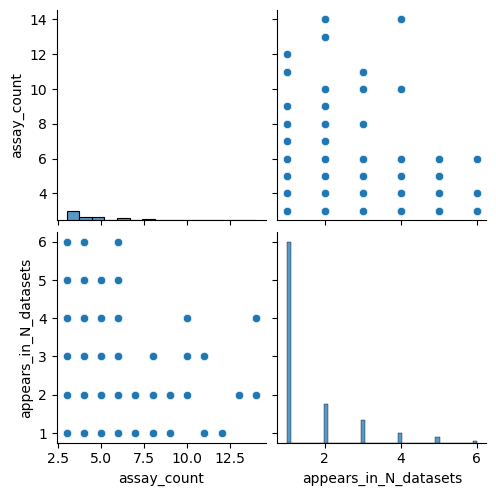

In [41]:
sns.pairplot(combined_literature_clean_w_counts[["assay_count", "appears_in_N_datasets"]])

In [42]:
combined_literature_clean_w_counts.drop(columns=["dataset"], inplace=True)

In [43]:
combined_literature_clean_w_counts

,CANONICAL_SMILES,INCHIKEY,action_type,active,common_name,appears_in_N_datasets,dataset_CHEMBL1142817,dataset_XinXu_NCATS_ADME_raw,dataset_aid_589039_clinically_relevant,dataset_carbon-mangels_2011,dataset_drugbank,dataset_flockheart,assay_count,pChEMBL mean,inclusion_score
790,O=c1[nH]c2ccccc2n1C1CCN(CCCC(c2ccc(F)cc2)c2ccc...,YVUQSNJEYSNKRX-UHFFFAOYSA-N,substrate,True,pimozide,6,True,True,True,True,True,True,6.0,5.322,12.0
791,CC(C)(C)NC(=O)C1C[C@@H]2CCCC[C@@H]2CN1C[C@@H](...,QWAXKHKRTORLEM-PVCXOJBVSA-N,substrate,True,saquinavir,6,True,True,True,True,True,True,3.0,5.540,9.0
794,NC(=O)N1c2ccccc2C=Cc2ccccc21,FFGPTBGBLSHEPO-UHFFFAOYSA-N,substrate,True,carbamazepine,6,True,True,True,True,True,True,NaN,NaN,NaN
2060,O=c1[nH]c2ccccc2n1C1CCN(CCCC(c2ccc(F)cc2)c2ccc...,YVUQSNJEYSNKRX-UHFFFAOYSA-N,substrate,True,pimozide,6,True,True,True,True,True,True,6.0,5.322,12.0
591,O=c1[nH]c2ccccc2n1C1CCN(CCCC(c2ccc(F)cc2)c2ccc...,YVUQSNJEYSNKRX-UHFFFAOYSA-N,substrate,True,pimozide,6,True,True,True,True,True,True,6.0,5.322,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3119,CCN(CC)CCSC(=O)C(c1ccccc1)c1ccccc1,WHLUQAYNVOGZST-UHFFFAOYSA-N,substrate,True,NaN,1,False,True,False,False,False,False,NaN,NaN,NaN
3118,COc1ccc(/C=C/C(=O)O)cc1,AFDXODALSZRGIH-QPJJXVBHSA-N,substrate,True,NaN,1,False,True,False,False,False,False,NaN,NaN,NaN
442,CCOC(=O)C1=C(C)N=C(C)C(C(=O)OCC)C1c1ccccc1/C=C...,BGYJFSXPRMOZJK-PFONDFGASA-N,substrate,True,lacidipine,1,False,False,False,True,False,False,NaN,NaN,NaN
3116,CCCCNC(=O)NS(=O)(=O)c1ccc(N)cc1,VDTNNGKXZGSZIP-UHFFFAOYSA-N,substrate,True,NaN,1,False,True,False,False,False,False,NaN,NaN,NaN


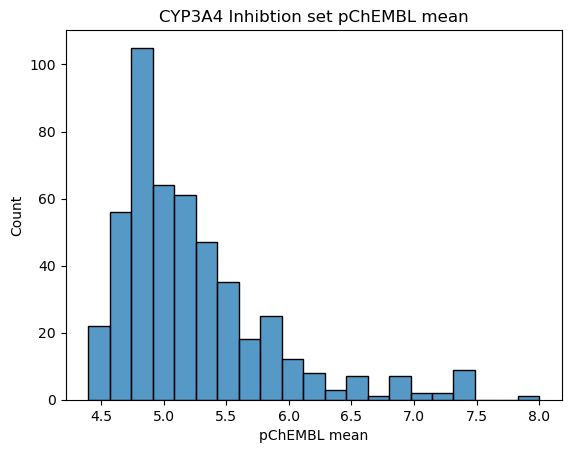

In [44]:
from matplotlib import pyplot as plt
plt.title("CYP3A4 Inhibtion set pChEMBL mean")
sns.histplot(combined_literature_clean_w_counts, x="pChEMBL mean")
plt.savefig("inhibition_set_pchembl.png")

<Axes: xlabel='inclusion_score', ylabel='Count'>

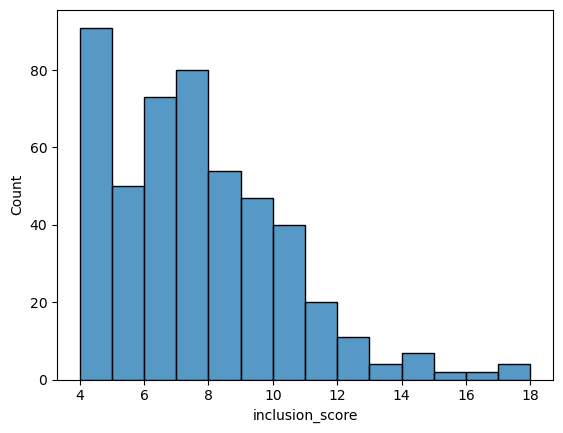

In [45]:
sns.histplot(combined_literature_clean_w_counts, x="inclusion_score")

In [46]:
combined_literature_clean_w_counts["pChEMBL mean"].notna().sum()

np.int64(485)

In [47]:
combined_literature_clean_w_counts.drop_duplicates(subset="INCHIKEY", inplace=True)

In [48]:
combined_literature_clean_w_counts.sort_values("inclusion_score", inplace=True, ascending=False)

In [49]:
combined_literature_clean_w_counts.head(20)

,CANONICAL_SMILES,INCHIKEY,action_type,active,common_name,appears_in_N_datasets,dataset_CHEMBL1142817,dataset_XinXu_NCATS_ADME_raw,dataset_aid_589039_clinically_relevant,dataset_carbon-mangels_2011,dataset_drugbank,dataset_flockheart,assay_count,pChEMBL mean,inclusion_score
1813,CC/C(=C(\c1ccccc1)c1ccc(OCCN(C)C)cc1)c1ccccc1,NKANXQFJJICGDU-QPLCGJKRSA-N,substrate,True,Tamoxifen,4,True,True,False,False,True,True,14.0,4.846154,18.0
1501,Clc1ccccc1C(c1ccccc1)(c1ccccc1)n1ccnc1,VNFPBHJOKIVQEB-UHFFFAOYSA-N,substrate,True,Clotrimazole,2,False,False,False,True,True,False,14.0,7.237692,16.0
2035,CNCCCC12CCC(c3ccccc31)c1ccccc12,QSLMDECMDJKHMQ-UHFFFAOYSA-N,substrate,True,maprotiline,2,False,True,False,True,False,False,13.0,5.473846,15.0
82,COC(=O)C1=C(C)N=C(C)C(C(=O)OC)C1c1ccccc1[N+](=...,OSUCQKNXQBPLDG-UHFFFAOYSA-N,substrate,True,Nifedipine,4,False,False,True,True,True,True,10.0,4.888000,14.0
1940,CN(C)CCCN1c2ccccc2CCc2ccc(Cl)cc21,GDLIGKIOYRNHDA-UHFFFAOYSA-N,substrate,True,Clomipramine,3,False,True,False,True,True,False,11.0,4.645455,14.0
886,COc1ccc(CCN(C)CCCC(C#N)(c2ccc(OC)c(OC)c2)C(C)C...,SGTNSNPWRIOYBX-UHFFFAOYSA-N,substrate,True,Verapamil,3,False,True,False,False,True,True,10.0,5.392000,13.0
2395,Clc1ccc(COC(Cn2ccnc2)c2ccc(Cl)cc2Cl)c(Cl)c1,BYBLEWFAAKGYCD-UHFFFAOYSA-N,substrate,True,NaN,1,False,True,False,False,False,False,12.0,6.060000,13.0
2473,CCN(CC)CCOCCOC(=O)C1(c2ccccc2)CCCC1,CFJMRBQWBDQYMK-UHFFFAOYSA-N,substrate,True,NaN,1,False,True,False,False,False,False,11.0,5.145455,12.0
790,O=c1[nH]c2ccccc2n1C1CCN(CCCC(c2ccc(F)cc2)c2ccc...,YVUQSNJEYSNKRX-UHFFFAOYSA-N,substrate,True,pimozide,6,True,True,True,True,True,True,6.0,5.322000,12.0
2336,Oc1ccc(C=Cc2cc(O)cc(O)c2)cc1,LUKBXSAWLPMMSZ-UHFFFAOYSA-N,substrate,True,NaN,1,False,True,False,False,False,False,11.0,5.556364,12.0


In [50]:
combined_literature_clean_w_counts.to_csv("./final/actives_final.csv", index=False)